# AF3 evaluation
Created 2025-03-07

Now, as the structures have been parsed (finally), it's time to regenerate the metrics of the AF2 benchmark

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import Axes
from matplotlib.figure import Figure
from pathlib import Path
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Settings

# Path to the parsed AF3 output
path_AF3_structures = Path("../ressources/AF3").resolve()

In [3]:
dataAF = pd.read_csv(path_AF3_structures / "AF3_metrics_full.tsv", sep="\t")
dataAF

,model_preset,benchmark_set,prediction_name,model_id,num_mutations,ranking_score,chainA_length,chainB_length,fraction_disordered,has_clash,...,sequence_initial,sequence_mutated,chainA_id,chainB_id,chainA_start,chainA_end,chainB_start,chainB_end,chains_flipped,model_path
0,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_0,NaN,0.28,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
1,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_1,NaN,0.25,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
2,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_2,NaN,0.22,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
3,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_3,NaN,0.19,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
4,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_4,NaN,0.17,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_0,NaN,0.93,312,4,0.02,0.0,...,NaN,NaN,A,B,59.0,361.0,140.0,143.0,True,AlphaFold_benchmark_DMI\random_minimal\gloomy_...
3176,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_1,NaN,0.92,312,4,0.01,0.0,...,NaN,NaN,A,B,59.0,361.0,140.0,143.0,True,AlphaFold_benchmark_DMI\random_minimal\gloomy_...
3177,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_2,NaN,0.92,312,4,0.02,0.0,...,NaN,NaN,A,B,59.0,361.0,140.0,143.0,True,AlphaFold_benchmark_DMI\random_minimal\gloomy_...
3178,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_3,NaN,0.91,312,4,0.01,0.0,...,NaN,NaN,A,B,59.0,361.0,140.0,143.0,True,AlphaFold_benchmark_DMI\random_minimal\gloomy_...


### ROC Curve

In [4]:
dataAF.columns

Index(['model_preset', 'benchmark_set', 'prediction_name', 'model_id',
       'num_mutations', 'ranking_score', 'chainA_length', 'chainB_length',
       'fraction_disordered', 'has_clash', 'iptm', 'ptm',
       'chainA_intf_avg_plddt', 'chainB_intf_avg_plddt', 'intf_avg_plddt',
       'num_chainA_intf_res', 'num_chainB_intf_res', 'num_res_res_contact',
       'num_atom_atom_contact', 'iPAE', 'pDockQ', 'RMSD_domain',
       'align_score_domain', 'num_align_atoms_domain', 'num_align_resi_domain',
       'RMSD_backbone_peptide', 'RMSD_all_atom_peptide', 'RMSD_DDI_max',
       'RMSD_all_atom', 'DockQ', 'iRMSD', 'LRMSD', 'Fnonnat', 'ipSAE',
       'PDB_id', 'ELM_instance', 'ddi_pfam_id', 'PDB_id_random_paired',
       'ELM_instance_random_paired', 'ddi_pfam_id_random_paired',
       'sequence_initial', 'sequence_mutated', 'chainA_id', 'chainB_id',
       'chainA_start', 'chainA_end', 'chainB_start', 'chainB_end',
       'chains_flipped', 'model_path'],
      dtype='object')

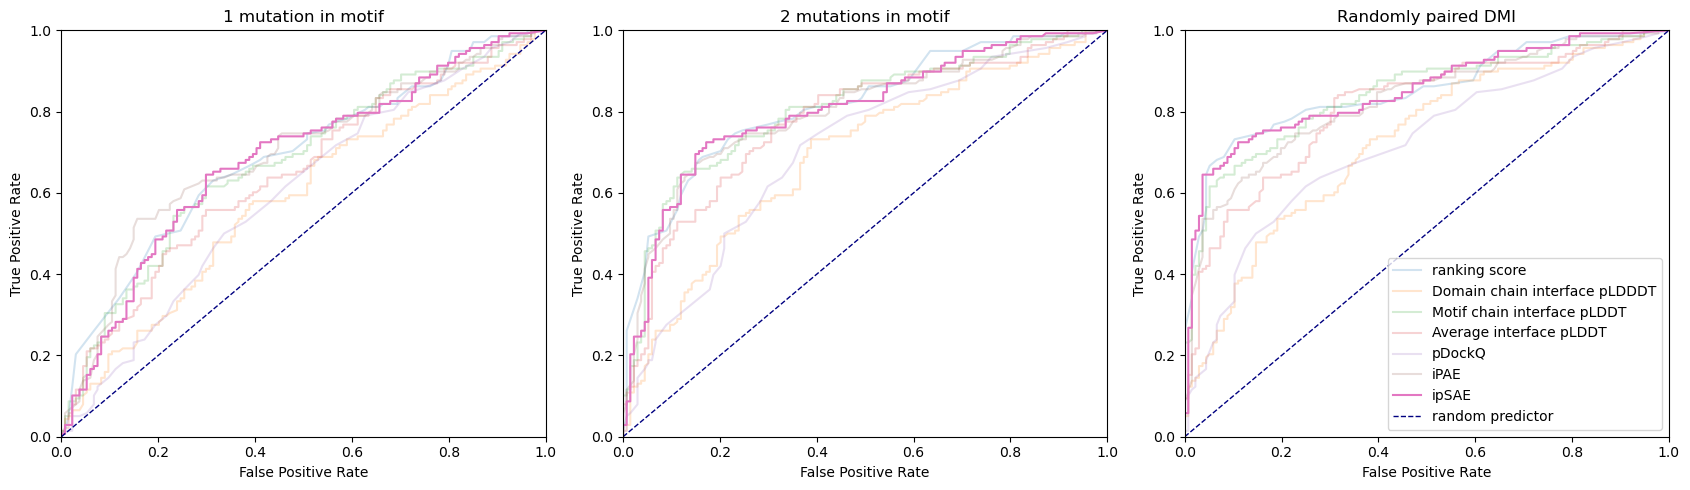

In [129]:
#plt.plot(roc_conf_X, roc_conf_Y, label=f"model confidence (AUC = {roc_conf:.2f})")
#plt.plot(roc_model_X, roc_model_Y, label=f"ml prediction (AUC = {roc_model:.2f})")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,5))
fig: Figure
axes: list[Axes] = list(axes)


    
axes[0].set_title("1 mutation in motif")
axes[1].set_title("2 mutations in motif")
axes[2].set_title("Randomly paired DMI")

# (display name, column name, reverse, highlight)
metric_columns = [("ranking score", "ranking_score"), 
                  ("Domain chain interface pLDDDT", "chainA_intf_avg_plddt"),
                  ("Motif chain interface pLDDT", "chainB_intf_avg_plddt"),
                  ("Average interface pLDDT", "intf_avg_plddt"),
                  ("pDockQ", "pDockQ"),
                  ("iPAE", "iPAE", True),
                  #("Residue-residue contact", "num_res_res_contact"),
                  #("Atom-Atom contact", "num_atom_atom_contact"),
                  ("ipSAE", "ipSAE", False, True)
                ]
metric_columns = [[x[0], x[1], x[2] if len(x) >= 3 else False, x[3] if len(x) >= 4 else False] for x in metric_columns]

rows_sets = [dataAF[dataAF["num_mutations"] == 1], dataAF[dataAF["num_mutations"] == 2], dataAF[dataAF["benchmark_set"] == "random_minimal"]]
rows_sets = [df[df["model_id"] == "ranked_0"] for df in rows_sets]
#rows_true = dataAF[dataAF["benchmark_set"] == "known_minimal"]
rows_true = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_minimal", dataAF["model_id"] == "ranked_0")]



for ax, rows_false in zip(axes, rows_sets):
    y_true = [1]*len(rows_true) + [0]*len(rows_false)

    for metric_label, metric_column, reverse, highlight in metric_columns:
        y_score = rows_true[metric_column].to_list() + rows_false[metric_column].to_list()
        if reverse:
            y_score = [-y for y in y_score]
        ax.plot(*roc_curve(y_true, y_score)[0:2], label=metric_label, alpha=0.2+0.8*highlight)

    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')


fig.tight_layout()
axes[2].legend(loc="lower right")
plt.show()


In [127]:
def violinplot_between_benchmarksets(column: str):
    sets = {"known minimal": "known_minimal", "random paired" : "random_minimal", "1 mutation": ("mutations", 1), "2 mutations": ("mutations", 2)}
    data = []
    for k, v in sets.items():
        if type(v) == str:
            data.append(list(dataAF[np.logical_and(dataAF["benchmark_set"] == v, np.logical_not(dataAF[column].isna()))][column]))
        else:
            data.append(list(dataAF[np.logical_and(np.logical_and(dataAF["benchmark_set"] == v[0], dataAF["num_mutations"] == v[1]), np.logical_not(dataAF[column].isna()))][column]))
    data_zero_elements_ind = [i for i in range(len(data)) if len(data[i]) == 0]
    data = [x for x in data if len(x) != 0]
    plt.violinplot(data, positions=[i for i in range(1, len(sets)+1) if i not in data_zero_elements_ind])
    plt.boxplot(data, showfliers=False, positions=[i for i in range(1, len(sets)+1) if i not in data_zero_elements_ind])
    plt.xticks(range(1, len(sets) + 1), sets.keys())
    plt.title(column)
    plt.show()

def violinplot_RMSD_based(column: str):
    global sets, data, data_zero_elements_ind
    sets = {"all": ("known_minimal", (-np.inf, np.inf)), 
            "RMSD<=2Å": ("known_minimal", (0, 2)), 
            "2Å<RMSD<=4Å": ("known_minimal", (2, 4)), 
            "4Å<RMSD<=6Å": ("known_minimal", (4, 6)), 
            "6Å<RMSD<=8Å": ("known_minimal", (6, 8)), 
            "8Å<RMSD": ("known_minimal", (8, np.inf)), 
        }
    data = []
    for k, v in sets.items():
        data.append(list(dataAF[np.logical_and(np.logical_and(dataAF["benchmark_set"] == v[0], np.logical_and(dataAF["RMSD_all_atom_peptide"] > v[1][0], dataAF["RMSD_all_atom_peptide"] <= v[1][1])), np.logical_not(dataAF[column].isna()))][column]))
    data_zero_elements_ind = [i for i in range(len(data)) if len(data[i]) == 0]
    data = [x for x in data if len(x) != 0]
    plt.violinplot(data, positions=[i for i in range(1, len(sets)+1) if i not in data_zero_elements_ind])
    plt.boxplot(data, showfliers=False, positions=[i for i in range(1, len(sets)+1) if i not in data_zero_elements_ind])
    for ii, i in enumerate([i for i in range(1, len(sets)+1) if i not in data_zero_elements_ind]):
        plt.annotate(f"n={len(data[ii])}", (i, np.max(data[ii])))
    plt.xticks(range(1, len(sets) + 1), sets.keys(), rotation=20)
    plt.title(f"known minimal {column}")
    plt.show()

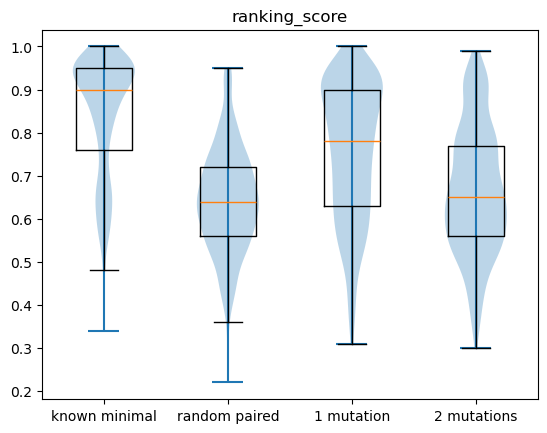

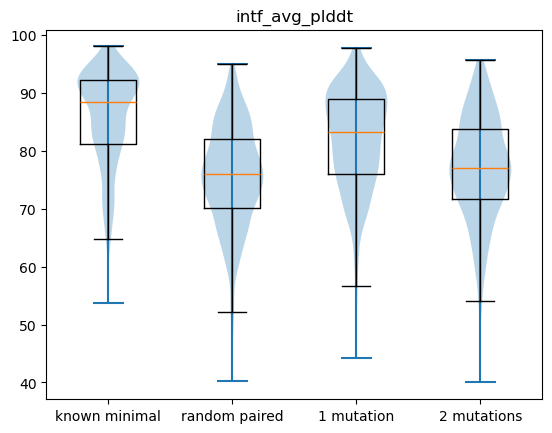

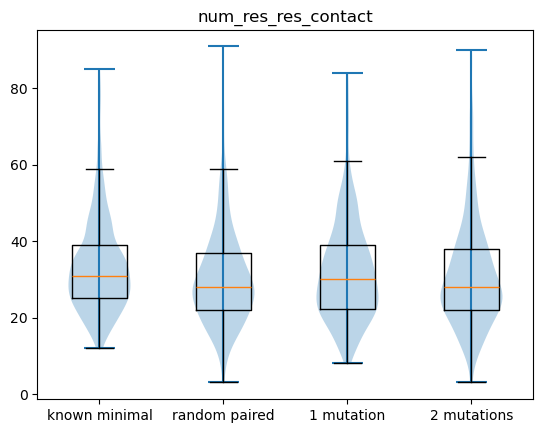

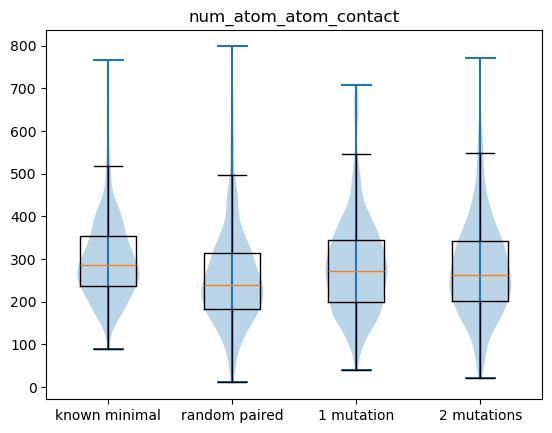

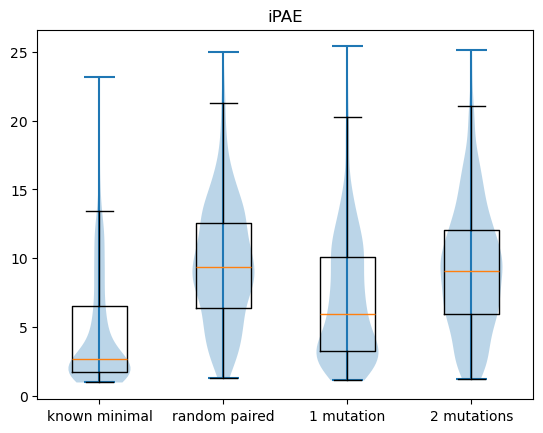

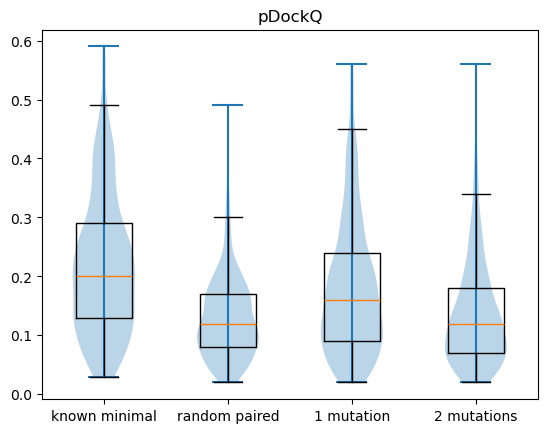

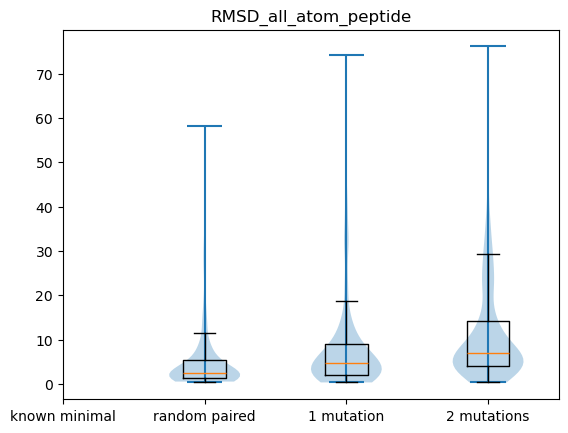

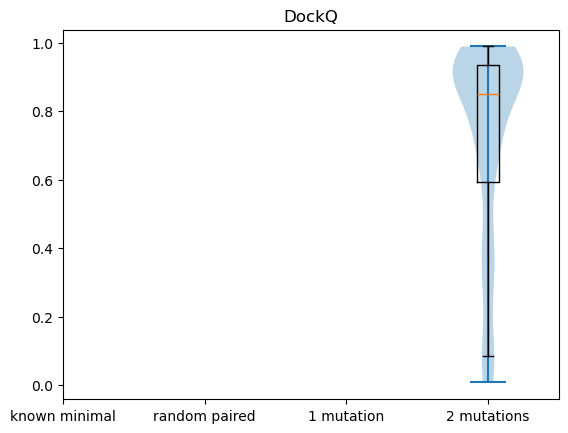

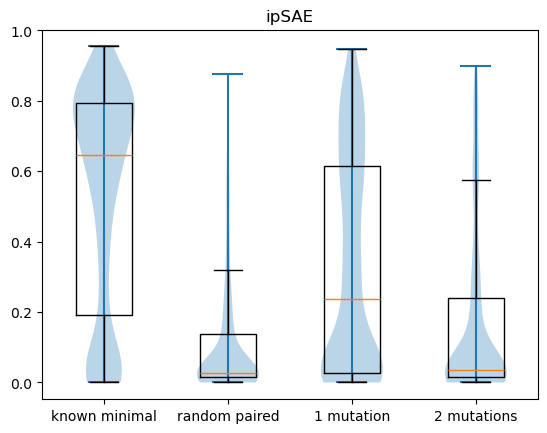

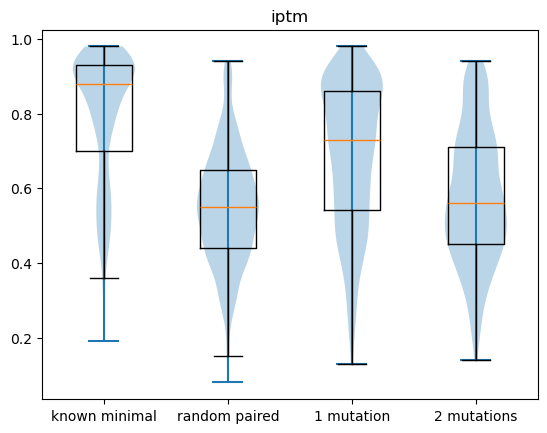

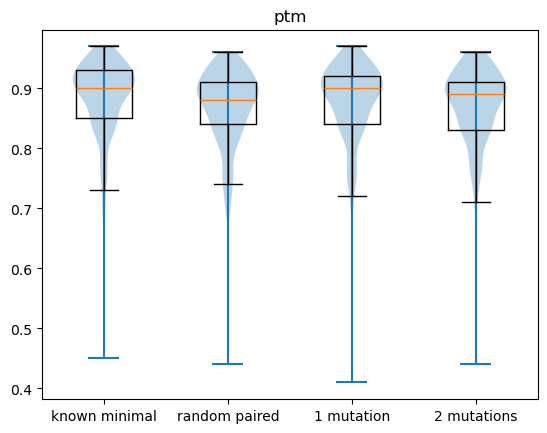

In [55]:
for c in ["ranking_score", "intf_avg_plddt", "num_res_res_contact", "num_atom_atom_contact", "iPAE", "pDockQ", "RMSD_all_atom_peptide", "DockQ", "ipSAE", "iptm", "ptm"]:
    violinplot_between_benchmarksets(c)

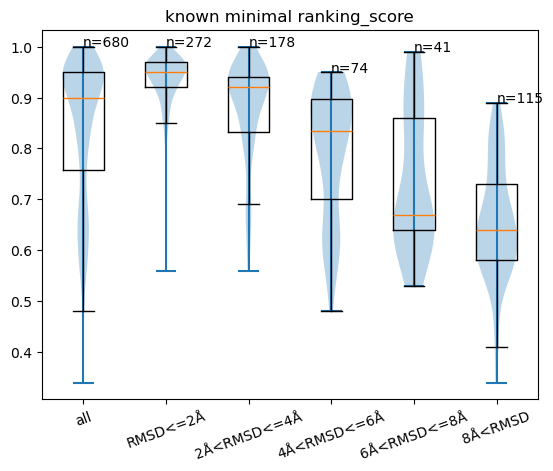

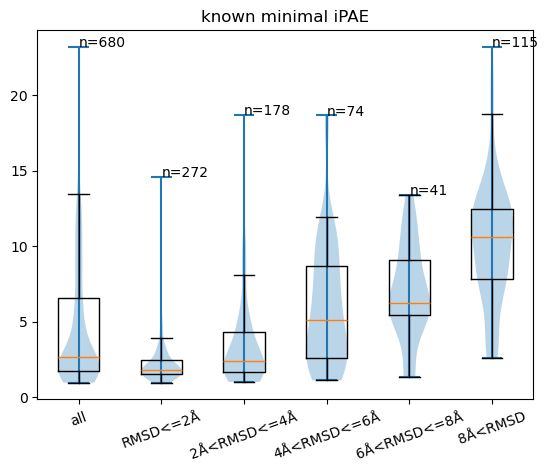

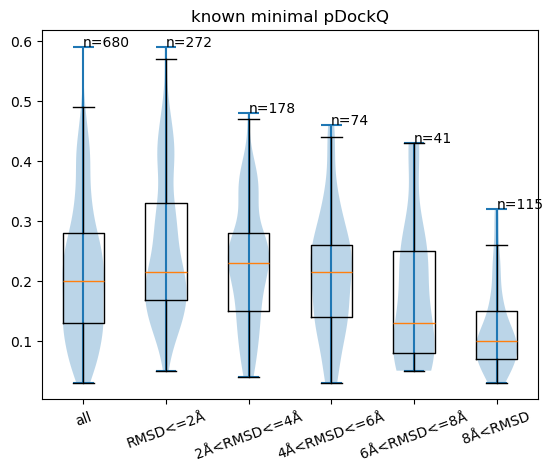

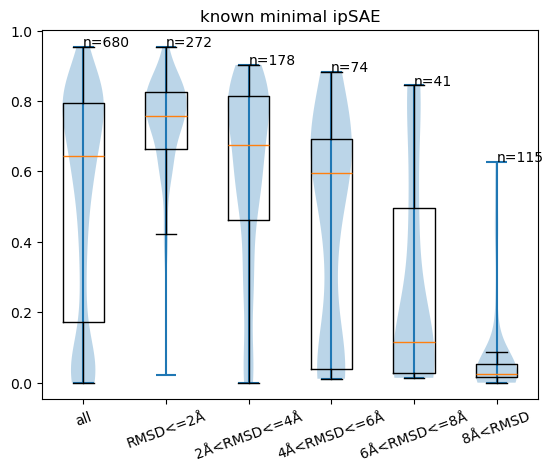

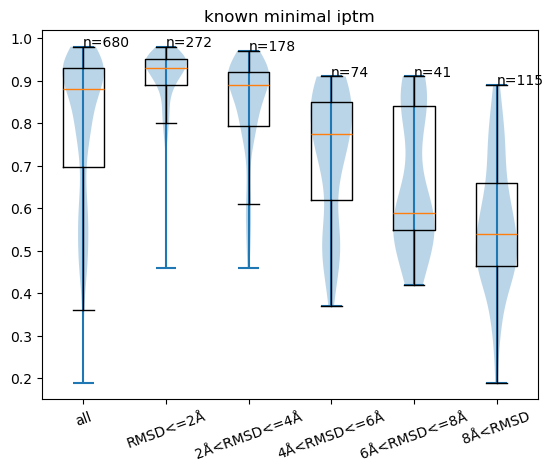

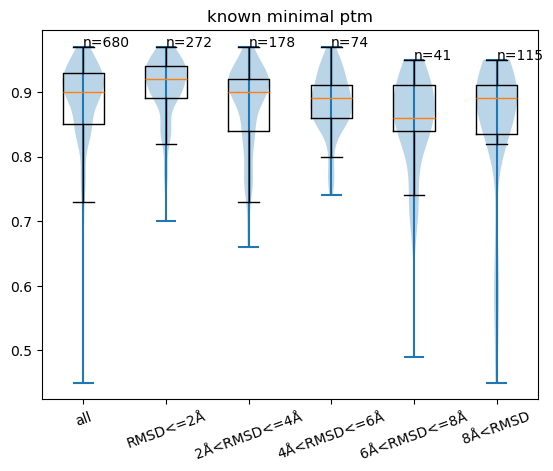

In [128]:
for c in ["ranking_score", "iPAE", "pDockQ", "ipSAE", "iptm", "ptm"]:
    violinplot_RMSD_based(c)

In [47]:
dataAF

,model_preset,benchmark_set,prediction_name,model_id,num_mutations,ranking_score,chainA_length,chainB_length,fraction_disordered,has_clash,...,sequence_initial,sequence_mutated,chainA_id,chainB_id,chainA_start,chainA_end,chainB_start,chainB_end,chains_flipped,model_path
0,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_0,NaN,0.28,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
1,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_1,NaN,0.25,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
2,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_2,NaN,0.22,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
3,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_3,NaN,0.19,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
4,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_4,NaN,0.17,189,113,0.04,0.0,...,NaN,NaN,A,B,12.0,200.0,21.0,133.0,True,AlphaFold_benchmark_DDI\known_ddi\suspicious_c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_0,NaN,0.93,312,4,0.02,0.0,...,NaN,NaN,A,B,59.0,361.0,140.0,143.0,True,AlphaFold_benchmark_DMI\random_minimal\gloomy_...
3176,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_1,NaN,0.92,312,4,0.01,0.0,...,NaN,NaN,A,B,59.0,361.0,140.0,143.0,True,AlphaFold_benchmark_DMI\random_minimal\gloomy_...
3177,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_2,NaN,0.92,312,4,0.02,0.0,...,NaN,NaN,A,B,59.0,361.0,140.0,143.0,True,AlphaFold_benchmark_DMI\random_minimal\gloomy_...
3178,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_3,NaN,0.91,312,4,0.01,0.0,...,NaN,NaN,A,B,59.0,361.0,140.0,143.0,True,AlphaFold_benchmark_DMI\random_minimal\gloomy_...


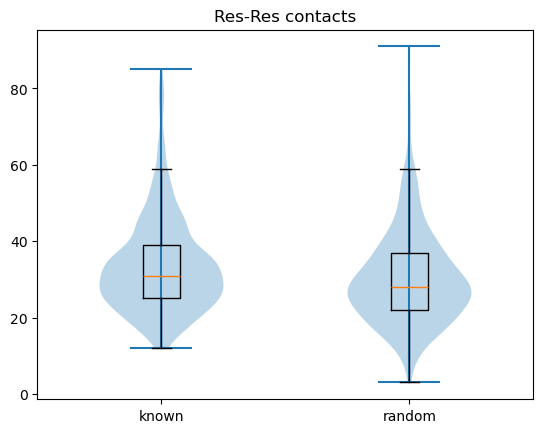

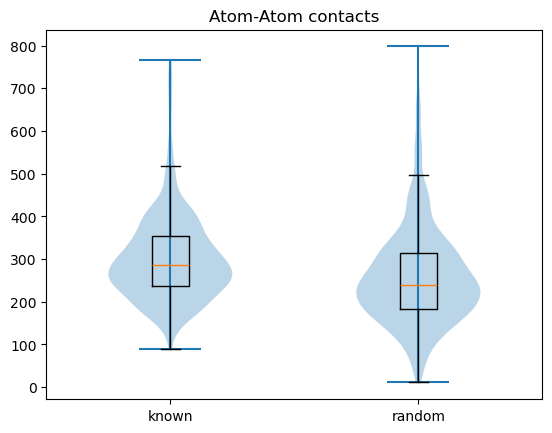

In [78]:
num_aa_known = dataAF[dataAF["benchmark_set"] == "known_minimal"]
num_aa_random = dataAF[dataAF["benchmark_set"] == "random_minimal"]
plt.violinplot([num_aa_known["num_res_res_contact"], num_aa_random["num_res_res_contact"]])
plt.boxplot([num_aa_known["num_res_res_contact"], num_aa_random["num_res_res_contact"]], showfliers=False)
plt.xticks([1,2], ["known", "random"])
plt.title("Res-Res contacts")
plt.show()
plt.violinplot([num_aa_known["num_atom_atom_contact"],num_aa_random["num_atom_atom_contact"]])
plt.boxplot([num_aa_known["num_atom_atom_contact"],num_aa_random["num_atom_atom_contact"]], showfliers=False)
plt.xticks([1,2], ["known", "random"])
plt.title("Atom-Atom contacts")
plt.show()

### RMSD correlation

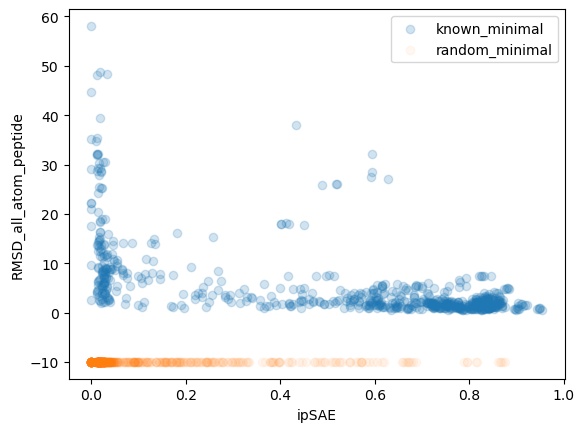

In [73]:
plt.scatter(dataAF[dataAF["benchmark_set"] == "known_minimal"]["ipSAE"], dataAF[dataAF["benchmark_set"] == "known_minimal"]["RMSD_all_atom_peptide"], alpha=0.2, label="known_minimal")
plt.scatter(dataAF[dataAF["benchmark_set"] == "random_minimal"]["ipSAE"], np.full(len(dataAF[dataAF["benchmark_set"] == "random_minimal"]), -10), alpha=0.05, label="random_minimal")
plt.xlabel("ipSAE")
plt.ylabel("RMSD_all_atom_peptide")
plt.legend()
plt.show()

### RMSD based classification

In [ ]:
dataAF["Rmsd"]